# Principal Component Analysis: Creating a Biplot using the Iris Dataset

The Iris dataset has 4 features: sepal width, sepal length, petal width, and petal length. It also includes a target variable indicating the species of each instance, which can be one of three types: setosa, versicolor, and virginica. To create a scatterplot of our observations using the original features, we would need a 4-dimensional feature space, which is inherently challenging to visualise directly.

In this notebook, we are going to use Principal Component Analysis (PCA) to project the instances of the Iris dataset into a 2-dimensional space. This allows us to create a scatterplot that incorporates information about all 4 features in a more interpretable form.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\moumi\AppData\Roaming\Python\Python312\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# load dataset and set up features and targets separately
iris = datasets.load_iris()
X = iris.data
y = iris.target

PCA works best when the data is standardised. However, the Iris dataset is already in appropriate units, so this step is optional depending on your analysis needs.

In [3]:
# Scale Data
x_scaled = StandardScaler().fit_transform(X)

We will perform PCA on the scaled data. We have 4 features in the Iris dataset, so we can create up to 4 principal components (PCs). Because the objective here is to create a biplot, we will only need the first two PCs. So, we will set the n_components parameter to 2.

In [4]:
# Perform PCA on Scaled Data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)

In [5]:
# Principal components correlation coefficients
loadings = pca.components_
loadings

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

pc1 = w11 X1 + w12 X2 + w13 X3 + w14 X4

pc2 = w21 X1 + w22 X2 + w23 X3 + w24 X4

The loadings above are the weights that define how each original feature contributes to each principal component. Each PC is a linear combination of the original features. So, given the above results, we have:

PC1 = 0.521 x (sepal length) - 0.269 x (sepal width) + 0.580 x (petal length) + 0.565 x (petal width)

PC2 = 0.377 x (sepal length) + 0.923 x (sepal width) + 0.024 x (petal length) + 0.067 x (petal width)

In [6]:
# Creating some necessary variables
# Number of features before PCA
n_features = pca.n_features_in_
n_features

4

In [7]:
# Feature names
feature_names = iris.feature_names

# PC names
pc_list = ['PC1', 'PC2']

# Match PC names to loadings and store in dictionary
pc_loadings = dict(zip(pc_list, loadings))
pc_loadings

{'PC1': array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 'PC2': array([0.37741762, 0.92329566, 0.02449161, 0.06694199])}

In [8]:
# Matrix of correlation coeficients (weights) between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [9]:
# Get the loadings of x (PC1) and y (PC2) axes
xs = loadings[0]
ys = loadings[1]

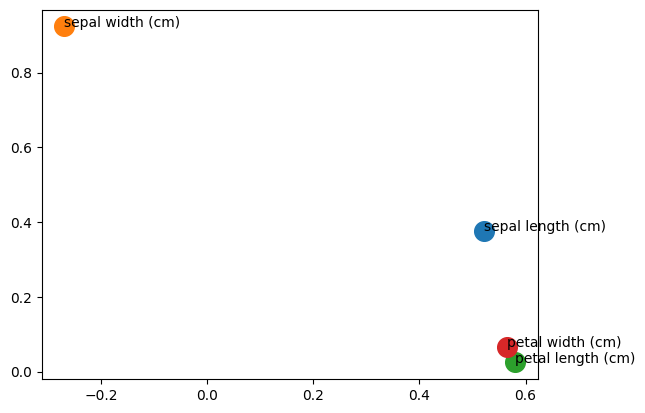

In [10]:
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)

Distances from the origin and angles between vectors are important for interpreting biplot results. So, we are going to plot arrows going from the origin (0,0) to our plotted loadings.

Text(0.5, 1.0, '2D Loading plot with vectors')

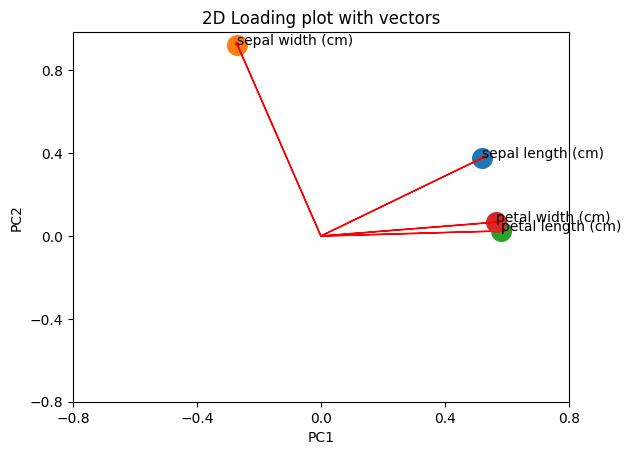

In [11]:
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Refining visualisation
# 5 evenly spaced values between -0.8 and 0.8
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)

# Label axes and add title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot with vectors')

We want to create a DataFrame which contains the coordinates of the original data points in the principal component space. These coordinates will represent how each original data point is represented in terms of the principal components. We obtained these coordinates when we applied pca.fit_transform() to our scaled data (x_scaled).

In [12]:
# Create DataFrame from PCA
pca_df = pd.DataFrame(
    data=pca_features,  # We obtained pca_features when we applied pca.fit_transform(x_scaled)
    columns=['PC1', 'PC2'])

# DataFrame containing coordinates in PC space
pca_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [13]:
# Map Targets to names
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

# Create target column in our coordinates df with target names
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
pca_df

,PC1,PC2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


We want to ensure that the principal components (PC1 and PC2) are on a comparable scale. Without scaling, their ranges could be vastly different, making it difficult to compare or visualise them together. By scaling, we normalise their ranges, ensuring that both components contribute equally to the visualisation or subsequent analysis.

The code below normalises the ranges of our two PCs.

In [14]:
# Scale PCs into a DataFrame
pca_df_scaled = pca_df.copy()

scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

pca_df_scaled

,PC1,PC2,target
0,-0.372175,0.089887,setosa
1,-0.341980,-0.126234,setosa
2,-0.388531,-0.064023,setosa
3,-0.377875,-0.111864,setosa
4,-0.392741,0.121122,setosa
...,...,...,...
145,0.307394,0.072461,virginica
146,0.257119,-0.167908,virginica
147,0.249985,0.050384,virginica
148,0.225600,0.189361,virginica


So at this stage, we have vector representations of our loadings (the plot that had arrows going from the origin to the loadings in the PC space) and we also have a DataFrame containing coordinates of our original data points in the PC space. We can combine the two to complete our biplot.

Text(0.5, 1.0, 'PCA Biplot of Iris dataset')

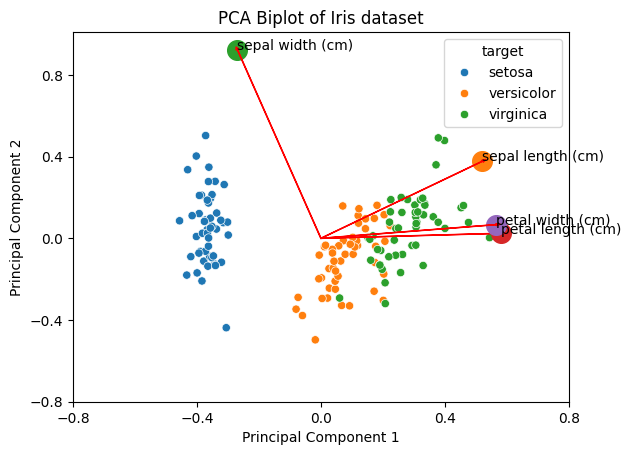

In [15]:
# Scatterplot of our original data points in the PC space
sns.scatterplot(
    x='PC1',
    y='PC2',
    data=pca_df_scaled,
    hue = 'target'
    )

# Adding vector representations of our loadings to the plot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r',
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)

# Refining visualisation with spacing, axes labels and a title
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Biplot of Iris dataset')

## Some observations

We will start with the observations we can make regarding the distribution of the data points:
 - We have clusters of observations corresponding to species classes.
 - Virginica and setosa data points are farther away from the origin, showing they have more extreme values on the principal components.
 - Virginica points are plotted in the directions of the petal width and petal length vectors, indicating that this species has higher values for these variables.
 - The setosa points are plotted in the opposite direction of the petal width and petal length vectors, indicating that this species has smaller values for these variables.


 We can also interpret angles between the vectors to understand correlations between variables:

 - The angle between the petal width and petal length vectors is very small, indicating a strong positive correlation between the two.
 - The narrow angle between sepal length and both petal width, as well as petal length, indicates a positive correlation between sepal length and these variables.
 - The angle between sepal width and sepal length looks like a right angle (90 degrees). This suggests there is no correlation between the two.

We will include a heatmap below to confirm that the angles between vectors are true reflections of the correlations that exist between variables.

<Axes: >

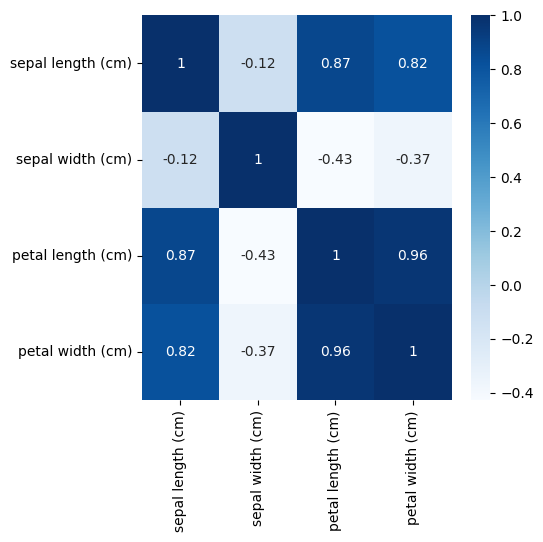

In [16]:
# Create DataFrame containing feature information
X_df = pd.DataFrame(X, columns = feature_names)

# Heatmap of feature correlations
plt.figure(figsize=(5, 5))
sns.heatmap(X_df.corr(), annot = True, cmap='Blues', cbar=True)


# Conclusion

Using a biplot, we were able to project our original data points into a 2-dimensional space that captures the information from all four features of our dataset. This visualisation helped us see how the data points are distributed and how each feature contributes to the overall structure. By examining the biplot, we could identify patterns and clusters in the data, making it easier to understand the relationships between different features and the principal components. Overall, the biplot provided a clear and informative summary of the dataset, highlighting key insights in a simple, visual format.

# Scree Plot

In [17]:
#Let us use all the principal components
# Perform PCA on Scaled Data
pca_all = PCA()
pca_features = pca_all.fit_transform(x_scaled)

In [18]:
#The amount of variance that each PC explains
var = pca_all.explained_variance_ratio_
print(var*100)

[72.96244541 22.85076179  3.66892189  0.51787091]


In [19]:
print('PC1 and PC2 account for '+str((var[0] + var[1])*100)+'% of the explained variance')

PC1 and PC2 account for 95.81320720000164% of the explained variance


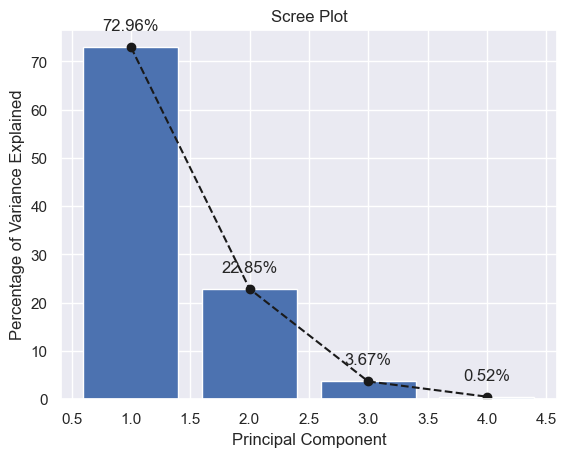

In [20]:
# Instead of starting the x component from 0, start from PC 1 and so on
PC_values = np.arange(pca_all.n_components_) + 1
sns.set_theme()
plt.plot(PC_values, var*100, 'o--', color='k')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
ax = plt.bar(range(1,len(var)+1),var*100)
plt.bar_label(ax,fmt='{:,.2f}%',padding=10)
plt.show()

Cumulative variance explained

In [21]:
#Cumulative Variance explained
cumul_var = np.cumsum(np.round(pca_all.explained_variance_ratio_, decimals=4)*100)
print(cumul_var)

[ 72.96  95.81  99.48 100.  ]


In [22]:
print('PC1 and PC2 account for '+str(cumul_var[1])+'% of the explained variance')
print('PC1, PC2 and PC3 account for '+str(cumul_var[2])+'% of the explained variance')

PC1 and PC2 account for 95.81% of the explained variance
PC1, PC2 and PC3 account for 99.48% of the explained variance


Text(0, 0.5, 'Cumulative Variance Explained')

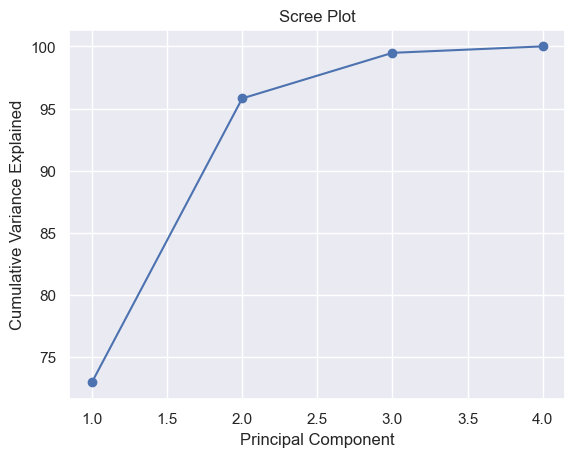

In [23]:
plt.plot(PC_values,cumul_var,marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')